In [1]:
import argparse
import os

In [2]:
import glob

In [3]:
#load data
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from torchvision import transforms, utils, datasets

In [4]:
from PIL import Image

In [5]:
import torch

In [6]:
from torch import nn
from torch.nn import functional as F

In [7]:
import torchvision

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
puppy_images = glob.glob('./vision_project/temp_training/puppy/*.jpg')
cat_images = glob.glob('./vision_project/temp_training/cat/*.jpg')
puppy_images_tensors = []
cat_images_tensors = []
puppy_types = []
cat_types = []
puppy_type = [1.0, 0.0]
cat_type = [0.0, 1.0]

In [10]:
puppy_images

['./vision_project/temp_training/puppy/15159739972169[1].jpg',
 './vision_project/temp_training/puppy/00501111_20190121.jpg']

In [11]:
cat_images

['./vision_project/temp_training/cat/18296_3834_4319.jpg',
 './vision_project/temp_training/cat/m0KUuT_K_400x400.jpg']

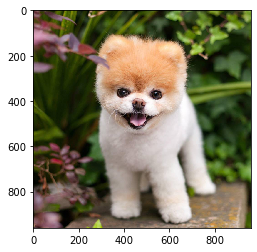

In [12]:
for puppy_image in puppy_images:
    img = Image.open(puppy_image)
    trans = transforms.ToPILImage()
    trans1 = transforms.ToTensor()
    puppy_images_tensors.append(trans1(img))
    #plt.imshow(trans(trans1(img)))
    puppy_types.append(puppy_type)
    
    #puppy_image_tensors.append()
    

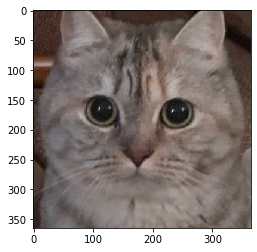

In [13]:
for cat_image in cat_images:
    img = Image.open(cat_image)
    trans = transforms.ToPILImage()
    trans1 = transforms.ToTensor()
    cat_images_tensors.append((trans1(img)))                     
    #plt.imshow(trans(trans1(img)))
    cat_types.append(cat_type)

In [14]:
puppy_images_tensors

[tensor([[[0.7765, 0.7765, 0.7725,  ..., 0.2941, 0.2980, 0.2980],
          [0.7765, 0.7765, 0.7686,  ..., 0.2941, 0.2980, 0.2980],
          [0.7765, 0.7765, 0.7725,  ..., 0.2980, 0.2980, 0.2980],
          ...,
          [0.5569, 0.5804, 0.6078,  ..., 0.8588, 0.8549, 0.8549],
          [0.5804, 0.5961, 0.6196,  ..., 0.8588, 0.8549, 0.8549],
          [0.6078, 0.6196, 0.6392,  ..., 0.8588, 0.8549, 0.8549]],
 
         [[0.7647, 0.7647, 0.7608,  ..., 0.2784, 0.2824, 0.2824],
          [0.7647, 0.7647, 0.7608,  ..., 0.2784, 0.2824, 0.2824],
          [0.7647, 0.7647, 0.7686,  ..., 0.2824, 0.2824, 0.2824],
          ...,
          [0.4000, 0.4235, 0.4510,  ..., 0.8588, 0.8549, 0.8549],
          [0.4157, 0.4314, 0.4627,  ..., 0.8588, 0.8549, 0.8549],
          [0.4431, 0.4549, 0.4745,  ..., 0.8588, 0.8549, 0.8549]],
 
         [[0.5647, 0.5647, 0.5608,  ..., 0.2314, 0.2353, 0.2353],
          [0.5569, 0.5569, 0.5608,  ..., 0.2314, 0.2353, 0.2353],
          [0.5490, 0.5490, 0.5569,  ...,

In [15]:
cat_images_tensors

[tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 tensor([[[0.2667, 0.2784, 0.2706,  ..., 0.2667, 0.2627, 0.2667],
          [0.2706, 0.2784, 0.2627,  ..., 0.2667, 0.2627, 0.2667],
          [0.2706, 0.2706, 0.2510,  ..., 0.2627, 0.2627, 0

In [16]:
puppy_types

[[1.0, 0.0], [1.0, 0.0]]

In [27]:
class SampleDataset(Dataset):
    def __init__(self, image, image_type_list):
        self.image = image
        self.image_type_list = torch.FloatTensor(image_type_list)
        
    def __len__(self):
        return len(self.image)
    
    def __getitem__(self, idx):
        material_type = self.image_type_list[idx]
        roof_image = self.image[idx]
        return material_type, roof_image
        
                                  

In [28]:
images_tensors = puppy_images_tensors + cat_images_tensors
print(images_tensors)
images_types = puppy_types + cat_types
print(images_types)

[tensor([[[0.7765, 0.7765, 0.7725,  ..., 0.2941, 0.2980, 0.2980],
         [0.7765, 0.7765, 0.7686,  ..., 0.2941, 0.2980, 0.2980],
         [0.7765, 0.7765, 0.7725,  ..., 0.2980, 0.2980, 0.2980],
         ...,
         [0.5569, 0.5804, 0.6078,  ..., 0.8588, 0.8549, 0.8549],
         [0.5804, 0.5961, 0.6196,  ..., 0.8588, 0.8549, 0.8549],
         [0.6078, 0.6196, 0.6392,  ..., 0.8588, 0.8549, 0.8549]],

        [[0.7647, 0.7647, 0.7608,  ..., 0.2784, 0.2824, 0.2824],
         [0.7647, 0.7647, 0.7608,  ..., 0.2784, 0.2824, 0.2824],
         [0.7647, 0.7647, 0.7686,  ..., 0.2824, 0.2824, 0.2824],
         ...,
         [0.4000, 0.4235, 0.4510,  ..., 0.8588, 0.8549, 0.8549],
         [0.4157, 0.4314, 0.4627,  ..., 0.8588, 0.8549, 0.8549],
         [0.4431, 0.4549, 0.4745,  ..., 0.8588, 0.8549, 0.8549]],

        [[0.5647, 0.5647, 0.5608,  ..., 0.2314, 0.2353, 0.2353],
         [0.5569, 0.5569, 0.5608,  ..., 0.2314, 0.2353, 0.2353],
         [0.5490, 0.5490, 0.5569,  ..., 0.2353, 0.2353, 0

In [29]:
dataset_all_train = SampleDataset(images_tensors, images_types)

In [32]:
datas  = DataLoader(dataset_all_train, batch_size = 1, shuffle = True)

In [33]:
for image, label in datas:
    print(image, label)

tensor([[1., 0.]]) tensor([[[[0.4431, 0.4510, 0.4588,  ..., 0.5569, 0.5608, 0.5647],
          [0.4235, 0.4314, 0.4275,  ..., 0.5529, 0.5529, 0.5529],
          [0.4000, 0.4039, 0.4078,  ..., 0.5451, 0.5412, 0.5412],
          ...,
          [0.4706, 0.4510, 0.4235,  ..., 0.2824, 0.2902, 0.3020],
          [0.4902, 0.4431, 0.4039,  ..., 0.2784, 0.2902, 0.2980],
          [0.4902, 0.4314, 0.4078,  ..., 0.2784, 0.2863, 0.2980]],

         [[0.2510, 0.2588, 0.2667,  ..., 0.6667, 0.6706, 0.6745],
          [0.2314, 0.2392, 0.2431,  ..., 0.6627, 0.6627, 0.6627],
          [0.2157, 0.2196, 0.2235,  ..., 0.6549, 0.6510, 0.6510],
          ...,
          [0.3294, 0.3059, 0.2902,  ..., 0.3843, 0.3922, 0.4078],
          [0.3451, 0.2941, 0.2667,  ..., 0.3804, 0.3922, 0.4000],
          [0.3412, 0.2902, 0.2667,  ..., 0.3804, 0.3882, 0.4000]],

         [[0.2745, 0.2824, 0.2902,  ..., 0.3373, 0.3412, 0.3451],
          [0.2549, 0.2627, 0.2667,  ..., 0.3333, 0.3294, 0.3294],
          [0.2392, 0.24

### from torch.utils.data import Dataset, DataLoader

#Load the boston Dataset, examine the data

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['target'] = boston_dataset.target
boston.head()

# Implement PyTorch DataLoader of the target dataset

class BostonDataset(Dataset):
    def __init__(self, feature_data, target_data):
        self.feature_data = torch.FloatTensor(feature_data.values.astype('float'))
        self.target_data = torch.FloatTensor(target_data.values.astype('float'))

    def __len__(self):
        return len(self.feature_data)

    def __getitem__(self, idx):
        target = self.target_data[idx]
        data = self.feature_data[idx]
        return data,target
      
dataset_all_train = BostonDataset(X_train, Y_train)
dataloader_all_train = DataLoader(dataset_all_train, batch_size=len(dataset_all_train), shuffle=True)
print(len(dataset_all_train))